# Introduction to Networkx

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx.drawing.layout import bipartite_layout

In [ ]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Undirected Graph

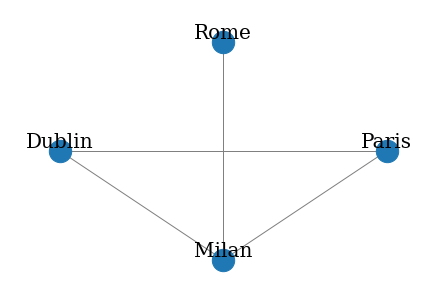

In [ ]:
G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [ ]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Milan', 'Paris', 'Rome']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Milan', 'Paris'), ('Milan', 'Rome')]


In [ ]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Dublin': 2, 'Milan': 3, 'Paris': 2, 'Rome': 1}
Neighbors for nodes: {'Dublin': ['Milan', 'Paris'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Paris': ['Milan', 'Dublin'], 'Rome': ['Milan']}


> Note: The neighborhood graph (also known as an ego graph) of a vertex v in a graph G is a subgraph of G, composed of the vertices adjacent to v and all edges connecting vertices adjacent to v.

In [ ]:
ego_graph_milan = nx.ego_graph(G, "Rome")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Milan', 'Rome']
Edges: [('Milan', 'Rome')]


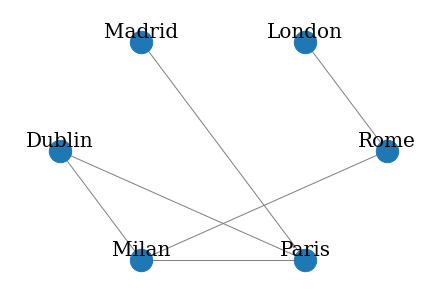

In [ ]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

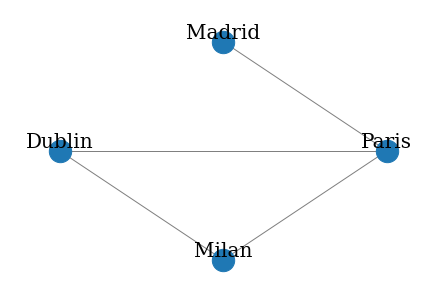

In [ ]:
node_remove = {'London', 'Rome'}
G.remove_nodes_from(node_remove)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

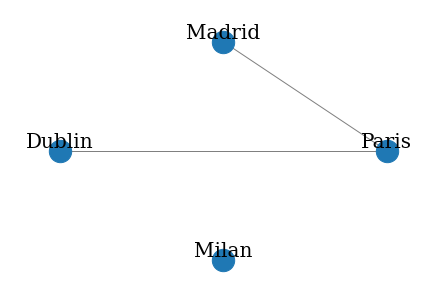

In [ ]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [ ]:
print(nx.to_edgelist(G))

[('Dublin', 'Paris', {}), ('Paris', 'Madrid', {})]


In [ ]:
print(nx.to_pandas_adjacency(G))

        Dublin  Milan  Paris  Madrid
Dublin     0.0    0.0    1.0     0.0
Milan      0.0    0.0    0.0     0.0
Paris      1.0    0.0    0.0     1.0
Madrid     0.0    0.0    1.0     0.0


## Directed Graph

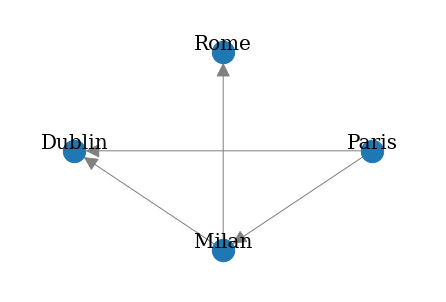

In [ ]:
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [ ]:
print(nx.to_pandas_edgelist(G))

  source  target
0  Milan  Dublin
1  Milan    Rome
2  Paris   Milan
3  Paris  Dublin


In [ ]:
print(nx.to_pandas_adjacency(G))

        Dublin  Milan  Paris  Rome
Dublin     0.0    0.0    0.0   0.0
Milan      1.0    0.0    0.0   1.0
Paris      1.0    1.0    0.0   0.0
Rome       0.0    0.0    0.0   0.0


In [ ]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outdegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Dublin': 2, 'Milan': 1, 'Paris': 0, 'Rome': 1}
Outdegree for nodes: {'Dublin': 0, 'Milan': 2, 'Paris': 2, 'Rome': 0}


## Weighted Directed Graph

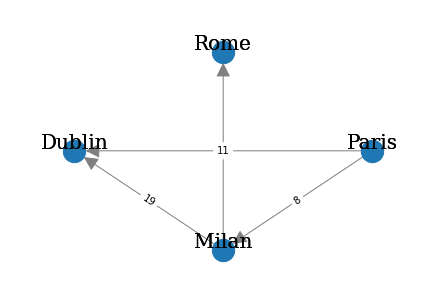

In [ ]:
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)

In [ ]:
print(nx.to_pandas_edgelist(G))

  source  target  weight
0  Milan    Rome       5
1  Milan  Dublin      19
2  Paris  Dublin      11
3  Paris   Milan       8


In [ ]:
print(nx.to_pandas_adjacency(G))

        Dublin  Milan  Paris  Rome
Dublin     0.0    0.0    0.0   0.0
Milan     19.0    0.0    0.0   5.0
Paris     11.0    8.0    0.0   0.0
Rome       0.0    0.0    0.0   0.0


## Bipartite Graph

In [ ]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),  
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

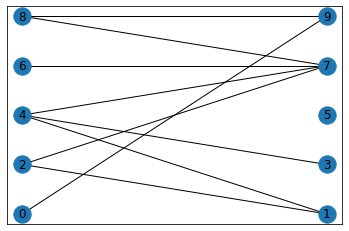

In [ ]:
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

## Multi Graph

A multigraph G is defined as G=(V, E), where V is a set of nodes and E is a multi-set (a set allowing multiple instances for each of its elements) of edges.

A multigraph is called a directed multigraph if E is a multi-set of ordered couples; otherwise, if E is a multi-set of two-sets, then it is called an undirected multigraph.

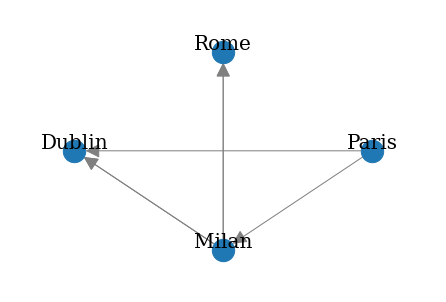

In [ ]:
G = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)